**Figures to compare performances of Sync HN vs Async HN vs SOM**

**Aggregated across all digits**

*Note: Metrics for Asynchronous Hopfield Network are derived using Ruchita Mijagiri's code*

In [1]:
# imports

import matplotlib.pyplot as plt
import pickle
import gc
import seaborn as sns
import pandas as pd
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

seed = 42
np.random.seed(seed)

In [2]:
# setting font size for graphs

SIZE = 14

plt.rc('font', size=SIZE)
plt.rc('axes', titlesize=SIZE)  
plt.rc('axes', labelsize=SIZE)  
plt.rc('xtick', labelsize=SIZE)    
plt.rc('ytick', labelsize=SIZE)  
plt.rc('legend', fontsize=SIZE) 
plt.rc('figure', titlesize=SIZE)

# set color cycle

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

In [3]:
# metrics for sync hn

with open("mse_sync.pkl", 'rb') as f:
    mse_sync = pickle.load(f)
with open("psnr_sync.pkl", 'rb') as f:
    psnr_sync = pickle.load(f)
with open("ssim_sync.pkl", 'rb') as f:
    ssim_sync = pickle.load(f)

# metrics for som

with open("mse_som.pkl", 'rb') as f:
    mse_som = pickle.load(f)
with open("psnr_som.pkl", 'rb') as f:
    psnr_som = pickle.load(f)
with open("ssim_som.pkl", 'rb') as f:
    ssim_som = pickle.load(f)

# metrics for async hn

with open("mse_async.pkl", 'rb') as f:
    mse_async = pickle.load(f)
with open("psnr_async.pkl", 'rb') as f:
    psnr_async = pickle.load(f)
with open("ssim_async.pkl", 'rb') as f:
    ssim_async = pickle.load(f)

In [4]:
# get avg across all 10 digits

avg_mse_sync, avg_mse_som, avg_mse_async = [], [] ,[]
avg_psnr_sync, avg_psnr_som, avg_psnr_async = [], [], []
avg_ssim_sync, avg_ssim_som, avg_ssim_async = [], [], []

for i in range(10):

    avg_mse_sync.append(mse_sync[i])
    avg_mse_som.append(mse_som[i])
    avg_mse_async.append(mse_async[i])

    avg_psnr_sync.append(psnr_sync[i])
    avg_psnr_som.append(psnr_som[i])
    avg_psnr_async.append(psnr_async[i])

    avg_ssim_sync.append(ssim_sync[i])
    avg_ssim_som.append(ssim_som[i])
    avg_ssim_async.append(ssim_async[i])

avg_mse_sync = np.average(np.array(avg_mse_sync), axis=0)
avg_mse_som = np.average(np.array(avg_mse_som), axis=0)
avg_mse_async = np.average(np.array(avg_mse_async), axis=0)

avg_psnr_sync = np.average(np.array(avg_psnr_sync), axis=0)
avg_psnr_som = np.average(np.array(avg_psnr_som), axis=0)
avg_psnr_async = np.average(np.array(avg_psnr_async), axis=0)

avg_ssim_sync = np.average(np.array(avg_ssim_sync), axis=0)
avg_ssim_som = np.average(np.array(avg_ssim_som), axis=0)
avg_ssim_async = np.average(np.array(avg_ssim_async), axis=0)

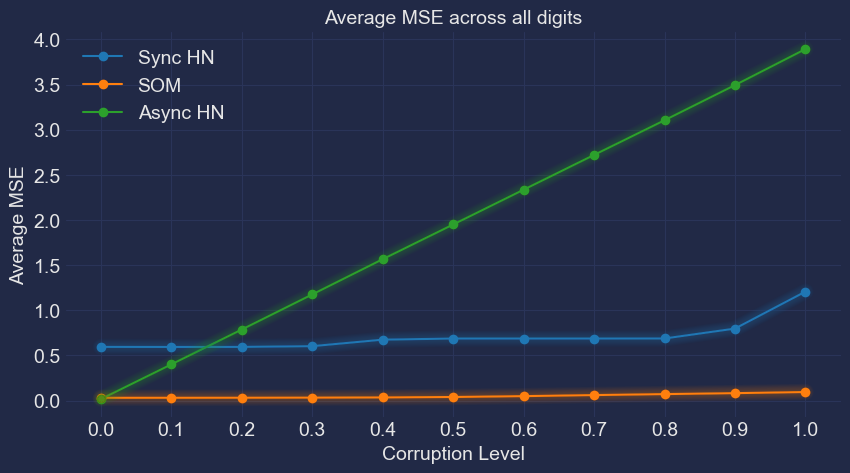

In [5]:
# avg mse

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_mse_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_mse_som, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_mse_async, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average MSE")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average MSE across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM', 'Async HN'])

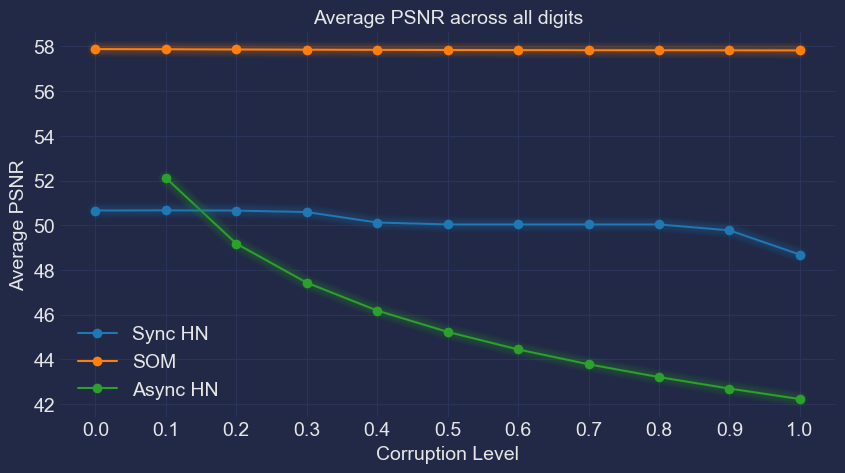

In [6]:
# avg psnr

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_psnr_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_psnr_som, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_psnr_async, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average PSNR")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average PSNR across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM', 'Async HN'])

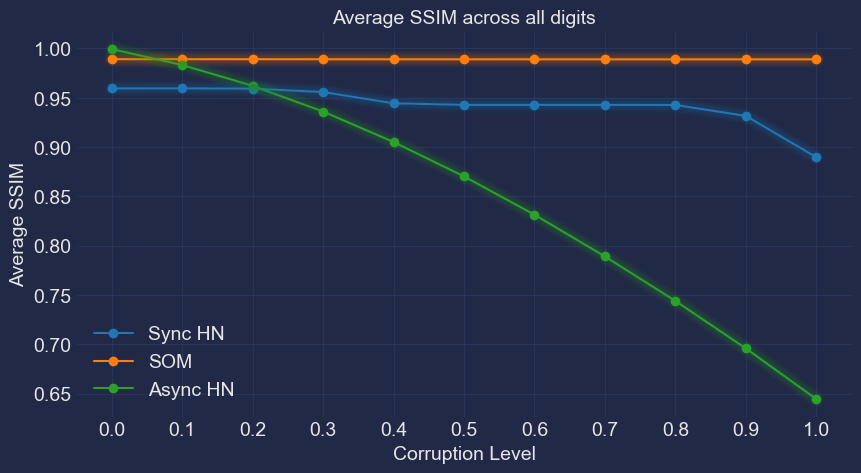

In [7]:
# avg ssim

plt.figure(figsize=(10, 5))

plt.plot(np.arange(0, 1.1, 0.1), avg_ssim_sync, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_ssim_som, marker='o')
plt.plot(np.arange(0, 1.1, 0.1), avg_ssim_async, marker='o')
plt.xlabel("Corruption Level")
plt.ylabel("Average SSIM")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.title("Average SSIM across all digits")
mplcyberpunk.make_lines_glow()
plt.legend(['Sync HN', 'SOM', 'Async HN'])

In [8]:
gc.collect()

0